 Data Loaded Successfully!
Shape: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y



 Missing Values:
Loan_ID        0
Gender        13
Married        3
Dependents    15
Education      0
dtype: int64

 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory

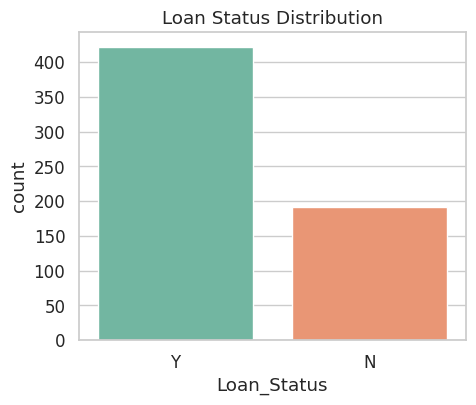

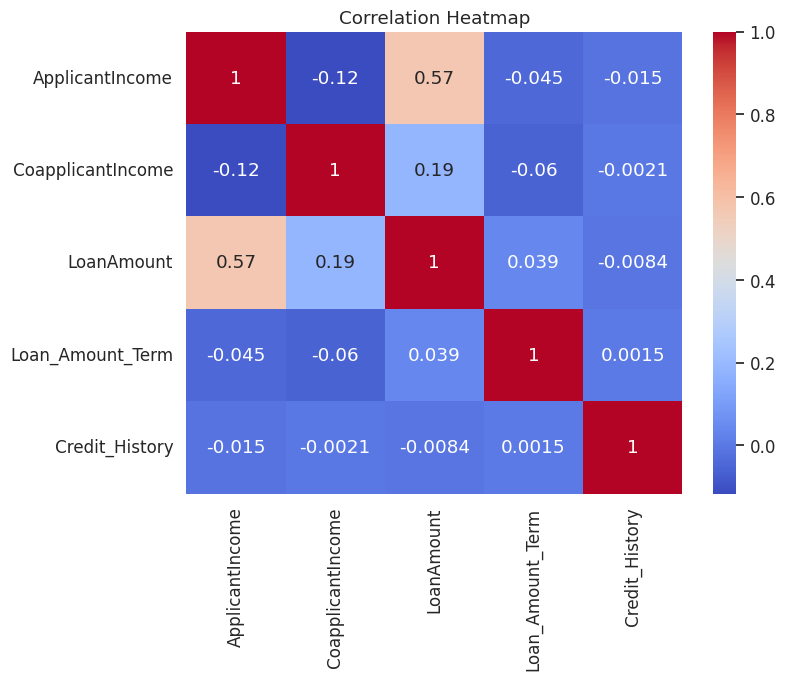


 Model Performance:
 Accuracy  : 83.74%
 Precision : 84.21%
 Recall    : 94.12%
 F1 Score  : 88.89%

Detailed Report:
               precision    recall  f1-score   support

           0       0.82      0.61      0.70        38
           1       0.84      0.94      0.89        85

    accuracy                           0.84       123
   macro avg       0.83      0.77      0.79       123
weighted avg       0.84      0.84      0.83       123



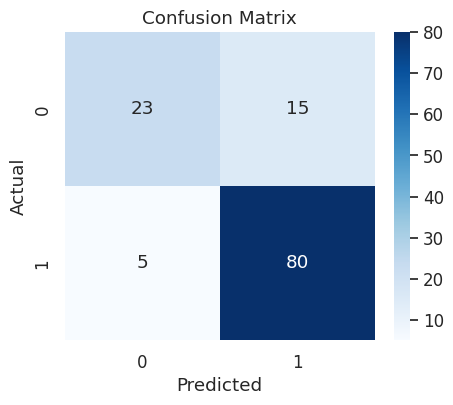

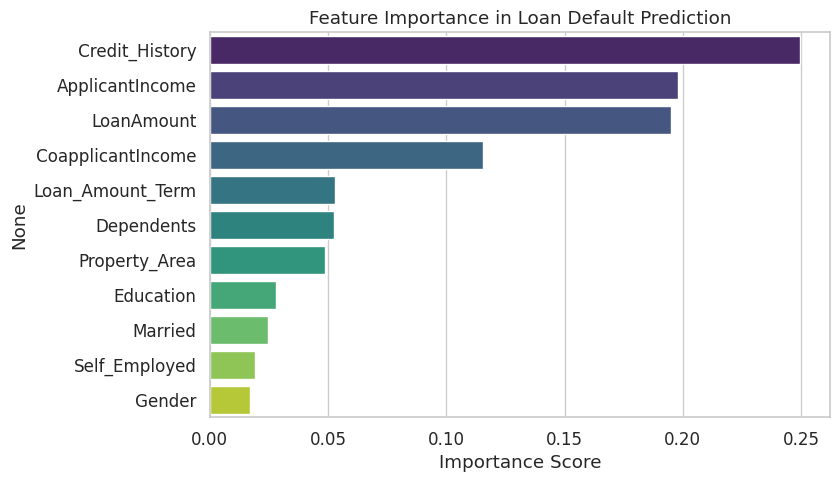


 Enter Applicant Details for Prediction:
Enter value for Gender (e.g., Female, Male): Male
Enter value for Married (e.g., No, Yes): Yes
Enter value for Dependents (e.g., 0, 1, 2, 3+): 1
Enter value for Education (e.g., Graduate, Not Graduate): Graduate
Enter value for Self_Employed (e.g., No, Yes): Yes
Enter numeric value for ApplicantIncome: 12000
Enter numeric value for CoapplicantIncome: 12600
Enter numeric value for LoanAmount: 13000
Enter numeric value for Loan_Amount_Term: 360
Enter numeric value for Credit_History: 1
Enter value for Property_Area (e.g., Rural, Semiurban, Urban): Urban

 Prediction: Loan will likely be APPROVED (No Default)


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")


data = pd.read_csv("loan_data_set.csv")

print(" Data Loaded Successfully!")
print("Shape:", data.shape)
display(data.head())


print("\n Missing Values:")
print(data.isnull().sum().head())

print("\n Data Info:")
print(data.info())




target_col = 'Loan_Status'
print(f"\n Target Column Identified: {target_col}")



plt.figure(figsize=(5,4))
sns.countplot(x=target_col, data=data, palette='Set2')
plt.title("Loan Status Distribution")
plt.show()


plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


for col in data.columns:
    if data[col].nunique() == len(data):
        data.drop(col, axis=1, inplace=True)


data = data.fillna(method='ffill')


categorical_cols = data.select_dtypes(include='object').columns.tolist()
if target_col in categorical_cols:
    categorical_cols.remove(target_col)

encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    encoders[col] = le


if data[target_col].dtype == 'object':
    le_target = LabelEncoder()
    data[target_col] = le_target.fit_transform(data[target_col].astype(str))
else:
    le_target = None



X = data.drop(target_col, axis=1)
y = data[target_col]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


model = RandomForestClassifier(
    n_estimators=300, max_depth=12, random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print("\n Model Performance:")
print(f" Accuracy  : {accuracy*100:.2f}%")
print(f" Precision : {precision*100:.2f}%")
print(f" Recall    : {recall*100:.2f}%")
print(f" F1 Score  : {f1*100:.2f}%")


print("\nDetailed Report:\n", classification_report(y_test, y_pred))


plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title("Feature Importance in Loan Default Prediction")
plt.xlabel("Importance Score")
plt.show()


print("\n Enter Applicant Details for Prediction:")
user_data = {}

for col in X.columns:
    if col in categorical_cols:
        val = input(f"Enter value for {col} (e.g., {', '.join(encoders[col].classes_)}): ")
        try:
            user_data[col] = [encoders[col].transform([val])[0]]
        except ValueError:
            print(f"Invalid input for {col}. Please enter one of: {', '.join(encoders[col].classes_)}")

            user_data[col] = [np.nan]
    else:
        try:
            val = float(input(f"Enter numeric value for {col}: "))
            user_data[col] = [val]
        except ValueError:
            print(f"Invalid input for {col}. Please enter a number.")
            user_data[col] = [np.nan]


user_df = pd.DataFrame(user_data)


user_df = user_df[X.columns]


for col in user_df.columns:
    if user_df[col].isnull().any():
        mean_val = X[col].mean()
        user_df[col] = user_df[col].fillna(mean_val)


user_df_scaled = scaler.transform(user_df)
prediction = model.predict(user_df_scaled)[0]

if prediction == 1:
    print("\n Prediction: Loan will likely be APPROVED (No Default)")
else:
    print("\n Prediction: Loan will likely DEFAULT")
